<h4><b>Import các module và thư viện cần thiết</b></h4>

In [1]:
import sys
sys.path.append("../Source")
import Community_layout as comm
import networkx as nx
import GraphUtil as gu
import matplotlib.pyplot as plt
import pandas as pd
import collections

<h2><b>I. Network Init</b></h2>

In [2]:
file = open("../data/StackOverflow_data.txt", 'r')
Graph = nx.DiGraph()
Lines = file.readlines()
for line in Lines:
    items = line.split()
    if len(items) == 0:
        continue
    if Graph.has_edge(items[0], items[1]):
        Graph[items[0]][items[1]]['weight'] += 1
    else:
        Graph.add_node(items[0])
        Graph.add_node(items[1])
        Graph.add_edge(items[0], items[1], weight=1)
print(Graph.number_of_edges())
print(Graph.number_of_nodes())

1026
300


<h2><b>II. Degree Distribution</b></h2>

Counter({1: 75, 0: 50, 2: 44, 3: 40, 4: 18, 5: 14, 7: 12, 8: 9, 6: 9, 10: 6, 9: 6, 11: 4, 12: 3, 14: 2, 39: 1, 27: 1, 21: 1, 19: 1, 18: 1, 17: 1, 15: 1, 13: 1})


<Figure size 432x288 with 0 Axes>

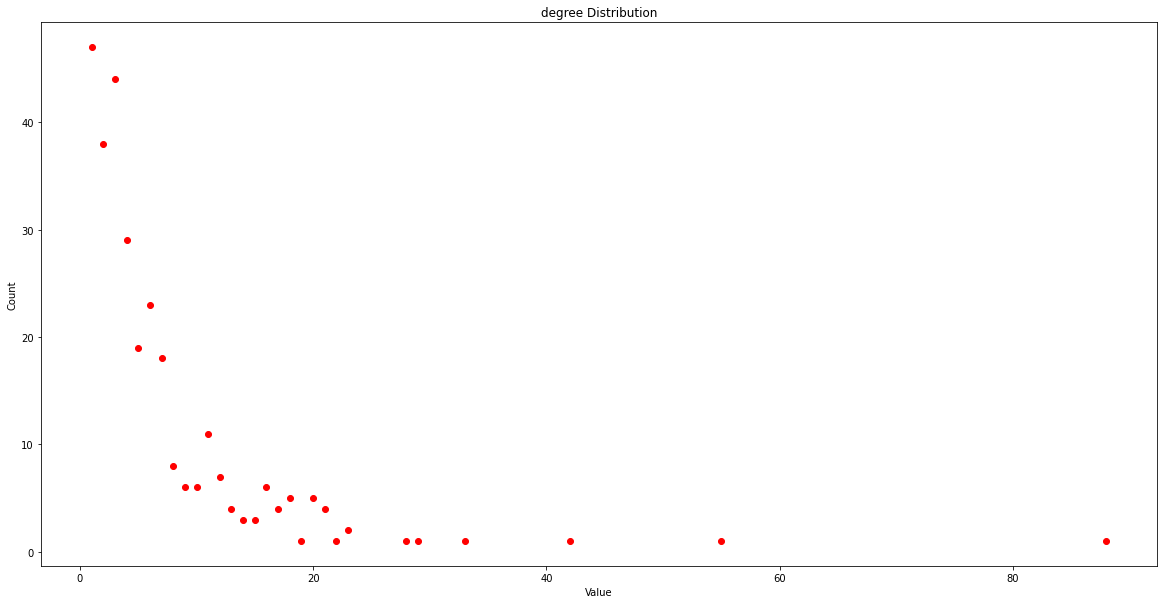

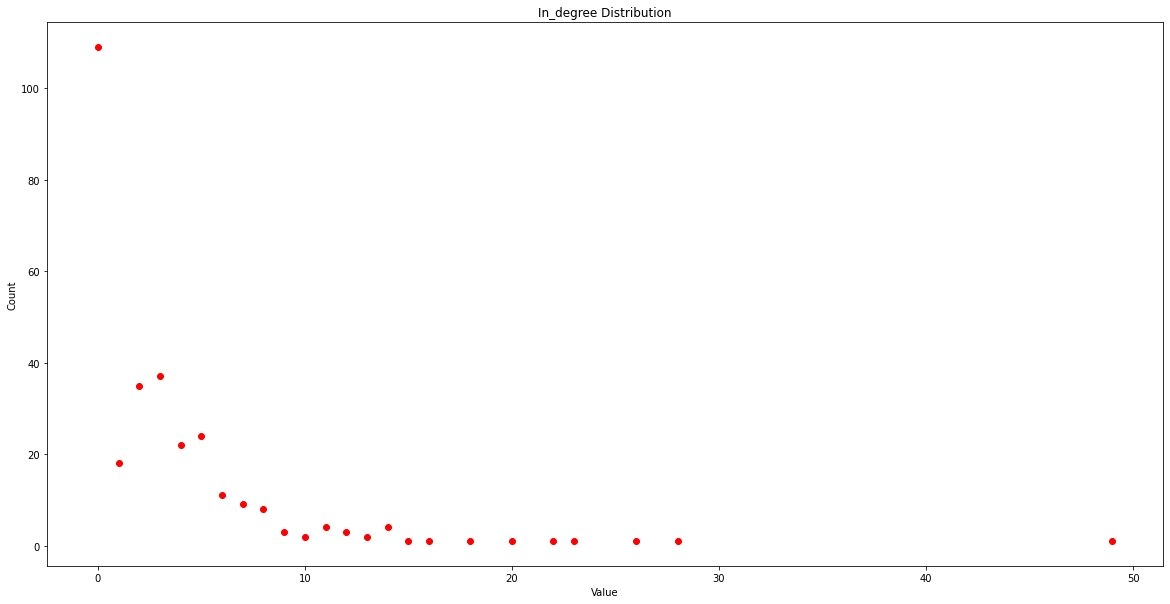

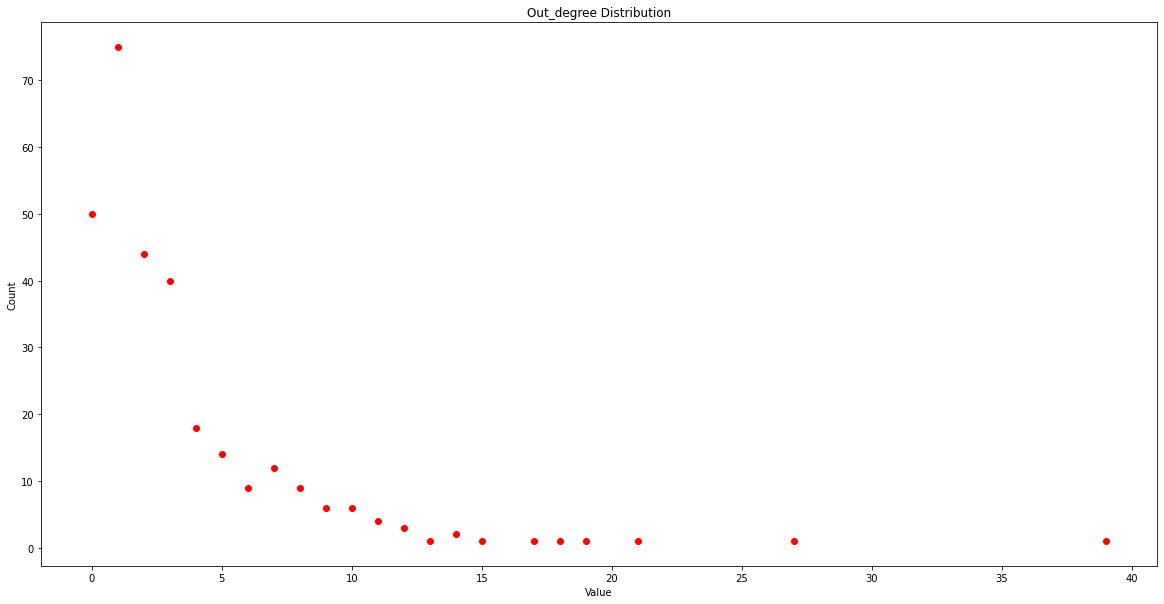

In [4]:
degree_sequence = sorted([d for n, d in Graph.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
plot1 = plt.figure(1)
plt.figure(figsize=[20,10])
plt.plot(list(degreeCount.keys()), list(degreeCount.values()), 'ro', markersize=6)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("degree Distribution")
# In degree
In_degree_sequence = sorted([d for n, d in Graph.in_degree()], reverse=True)
In_degreeCount = collections.Counter(In_degree_sequence)
plot2 = plt.figure(2)
plt.figure(figsize=[20,10])
plt.plot(list(In_degreeCount.keys()), list(In_degreeCount.values()), 'ro', markersize=6)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("In_degree Distribution")
# out degree
Out_degree_sequence = sorted([d for n, d in Graph.out_degree()], reverse=True)
Out_degreeCount = collections.Counter(Out_degree_sequence)
print(Out_degreeCount)
plot3 = plt.figure(3)
plt.figure(figsize=[20,10])
plt.plot(list(Out_degreeCount.keys()), list(Out_degreeCount.values()), 'ro', markersize=6)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Out_degree Distribution")
# show
plt.show()

<h2><b>III. Community Detection</b></h2>

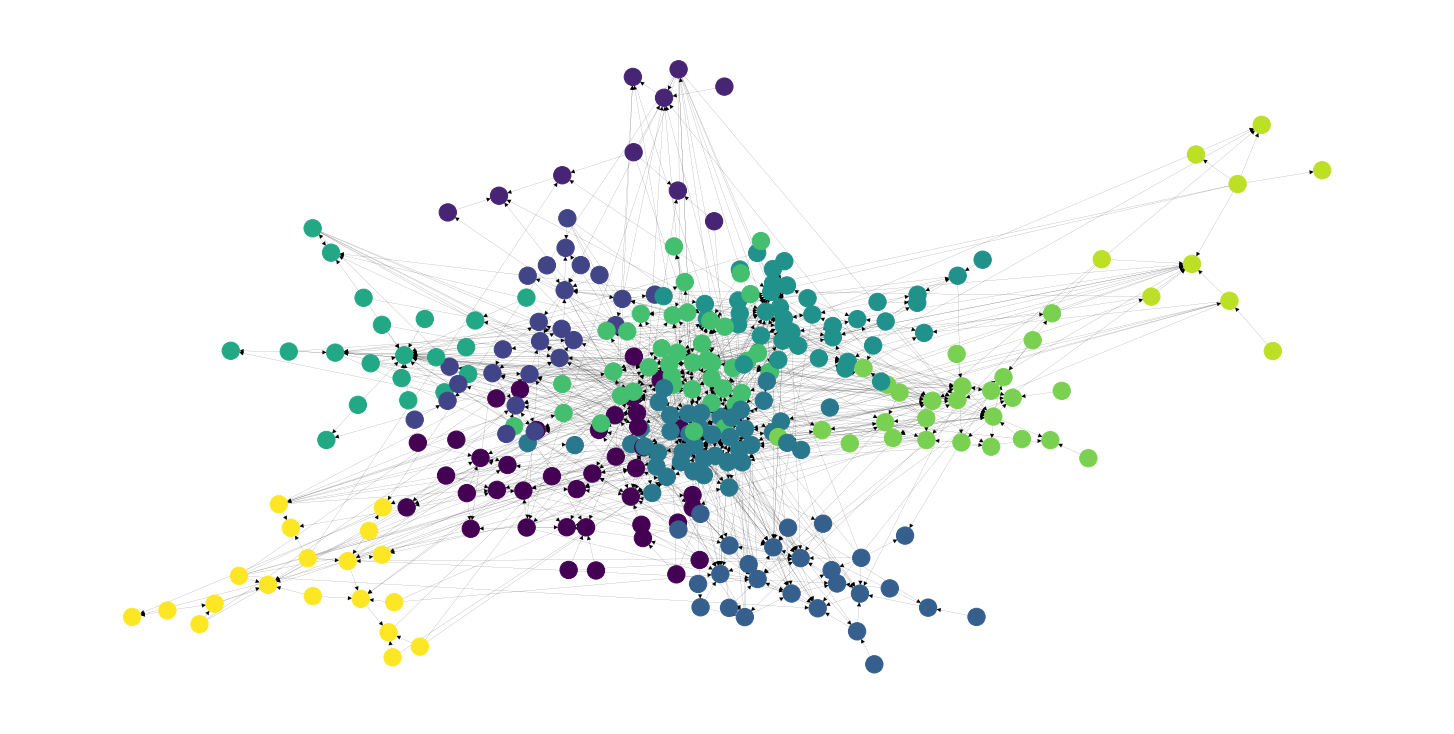

Các community
Comm 1: ['9', '8', '48', '2', '19', '32', '51', '80', '87', '44', '70', '5', '144', '149', '173', '172', '205', '192', '142', '227', '234', '224', '254', '3', '67', '120', '275', '281', '258', '292', '194', '102', '328', '242', '195', '371', '380', '379', '390', '446', '519']
Comm 2: ['1', '17', '233', '212', '443', '479', '489', '493', '503', '507']
Comm 3: ['13', '23', '11', '35', '49', '60', '26', '71', '62', '109', '100', '123', '163', '209', '186', '243', '245', '313', '333', '331', '95', '459', '488', '279', '547']
Comm 4: ['33', '45', '111', '27', '230', '232', '264', '225', '307', '350', '193', '395', '170', '414', '3394', '404', '428', '434', '327', '415', '444', '237', '274', '468', '512', '517']
Comm 5: ['39', '43', '22', '40', '37', '36', '34', '42', '91', '93', '119', '76', '200', '206', '238', '131', '246', '231', '121', '304', '271', '308', '340', '316', '349', '357', '298', '383', '396', '384', '409', '152', '422', '435', '75', '437', '449', '360', '476', 

In [3]:
community, pos = gu.get_com_pos(Graph)
plt.figure(figsize=[20,10])
nx.draw(Graph, pos=pos, node_color=list(community.values()), width=0.1)
plt.show()
print("Các community")
partition = []
for value in community.values():
    if value not in partition:
        partition.append(value)
comm = 1
for com in partition:
    print('Comm {}: {}'.format(comm,[k for k, v in community.items() if v == com]))
    comm+=1

<h2><b>IV. Closeness Centrality</b></h2>

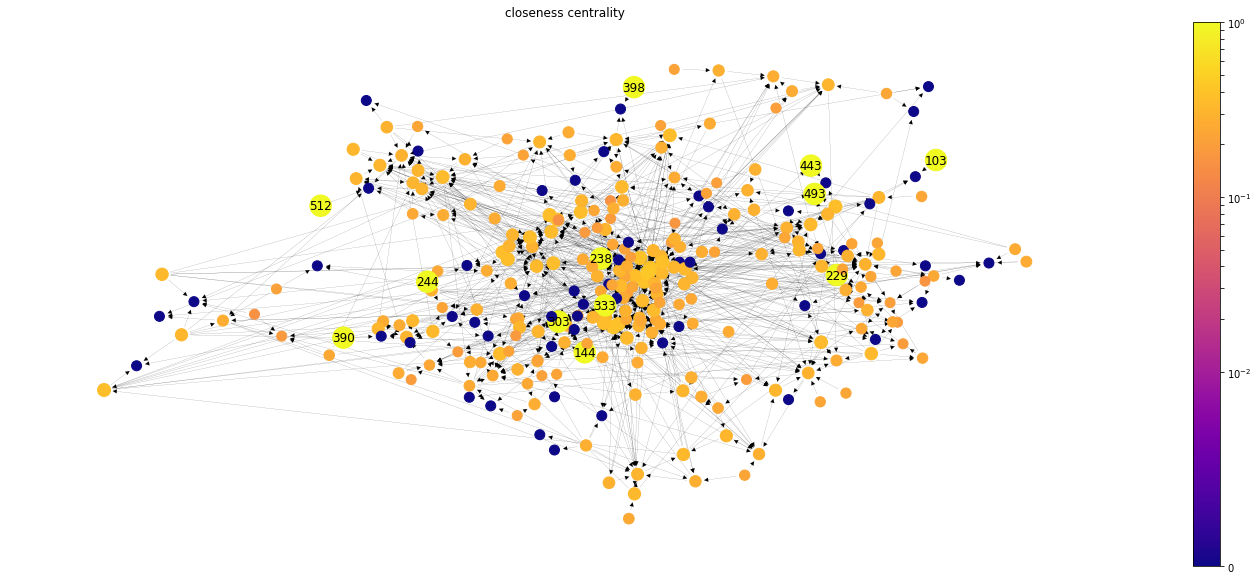

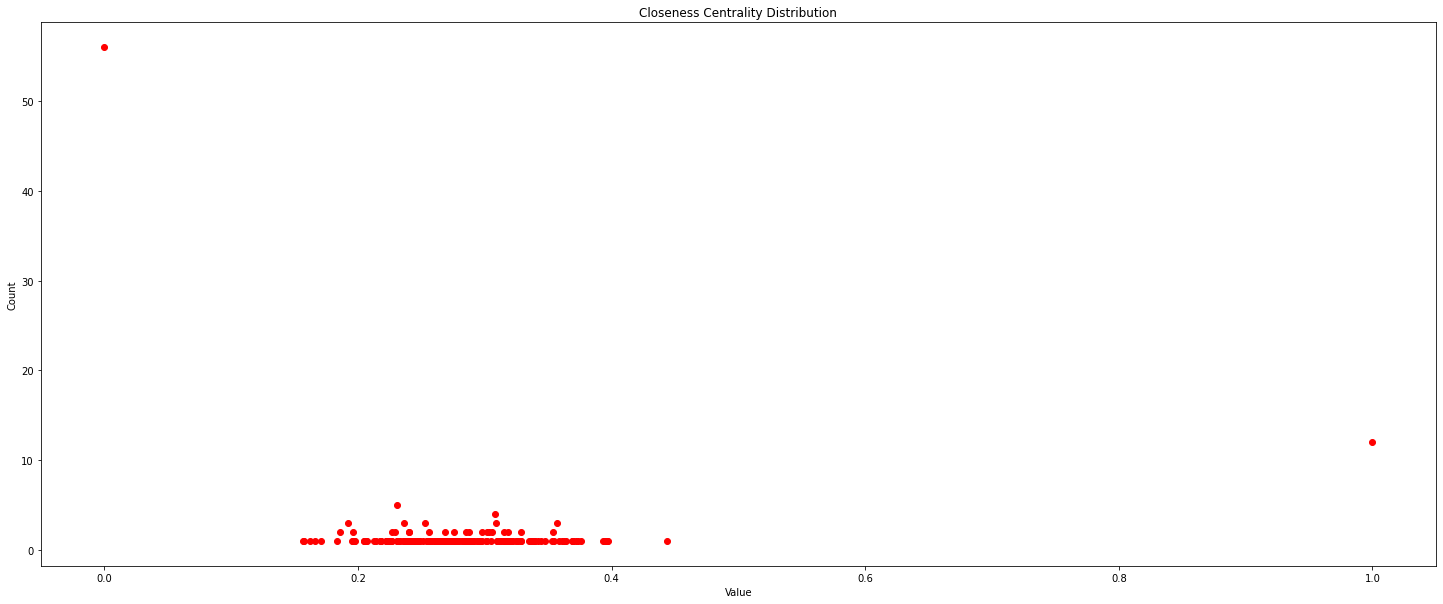

        node     value
0          9  0.255882
1          8  0.000000
2          1  0.197727
3         13  0.240664
4         17  0.393665
..       ...       ...
295      519  0.270479
296      529  0.230567
297  1388162  0.000000
298      517  0.000000
299      317  0.266362

[300 rows x 2 columns]
Các đỉnh có giá trị Closeness Centrality lớn: [('144', 1.0), ('229', 1.0), ('238', 1.0), ('244', 1.0), ('333', 1.0), ('303', 1.0), ('390', 1.0), ('398', 1.0), ('443', 1.0), ('103', 1.0), ('493', 1.0), ('512', 1.0), ('91', 0.44387755102040816), ('116', 0.3972602739726027), ('34', 0.39635535307517084), ('200', 0.39545454545454545), ('122', 0.3945578231292517), ('17', 0.3936651583710407), ('383', 0.3758099352051836), ('71', 0.37339055793991416)]


In [18]:
cs = nx.algorithms.centrality.closeness_centrality(Graph.reverse(), wf_improved=False)
# Vẽ đồ thị
_, pos = gu.get_com_pos(Graph)
plt.figure(figsize=[25,10])
plt.figure(1)
gu.draw_size(Graph, cs, "closeness centrality", pos,460,0.1,DisplayLabel=True)
# Closeness Distribution
distribute_count = collections.Counter(list(cs.values()))
plt.figure(figsize=[25,10])
plt.figure(2)
plt.plot(list(distribute_count.keys()), list(distribute_count.values()), 'ro', markersize=6)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Closeness Centrality Distribution")
plt.show()
# In giá trị
gu.print_result(cs, "Closeness Centrality")

<h2><b>V. Degree Centrality</b></h2>

Degree centrality
        node     value
0          9  0.030100
1          8  0.013378
2          1  0.036789
3         13  0.036789
4         17  0.053512
..       ...       ...
295      519  0.006689
296      529  0.003344
297  1388162  0.003344
298      517  0.006689
299      317  0.003344

[300 rows x 2 columns]
Các đỉnh có giá trị degree centrality lớn: [('91', 0.294314381270903), ('383', 0.18394648829431437), ('116', 0.14046822742474915), ('25', 0.11036789297658862), ('58', 0.09698996655518395), ('136', 0.09364548494983277), ('34', 0.07692307692307693), ('83', 0.07692307692307693), ('2089740', 0.07357859531772575), ('200', 0.07023411371237458), ('192', 0.07023411371237458), ('307', 0.07023411371237458), ('92', 0.07023411371237458), ('72', 0.06688963210702341), ('30', 0.06688963210702341), ('122', 0.06688963210702341), ('1384652', 0.06688963210702341), ('230', 0.06688963210702341), ('269', 0.06354515050167224), ('39', 0.06020066889632107)]


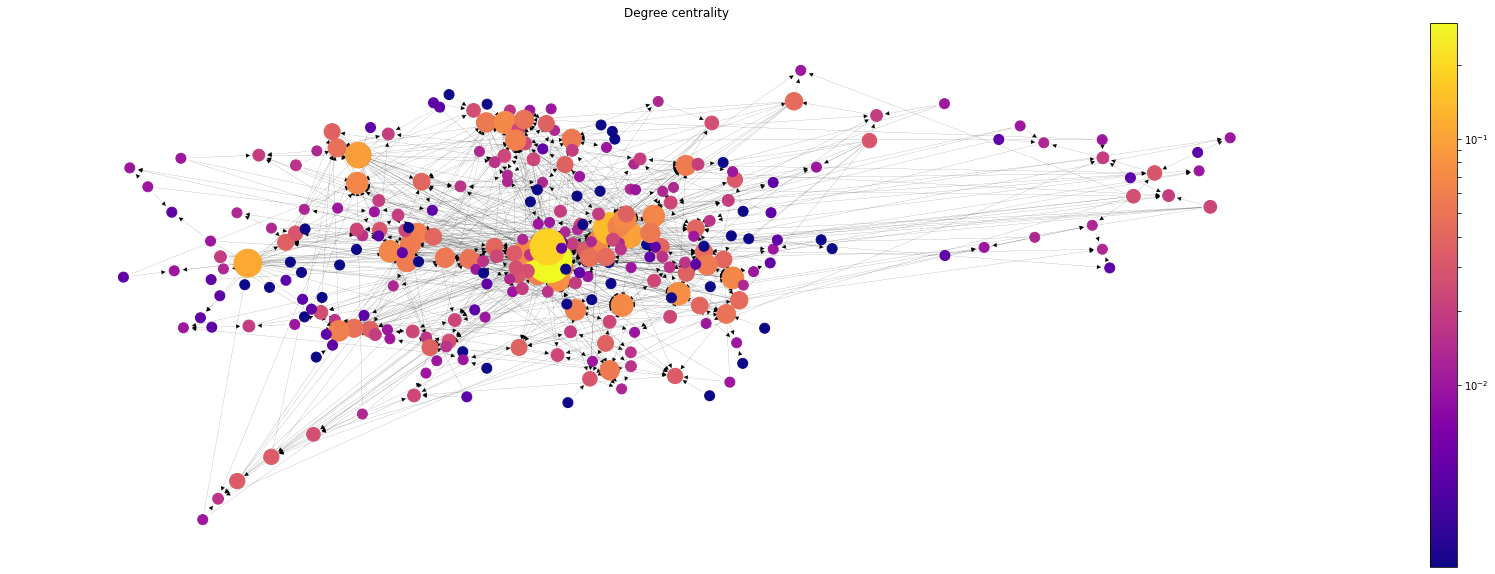

In Degree centrality
        node     value
0          9  0.023411
1          8  0.013378
2          1  0.026756
3         13  0.013378
4         17  0.006689
..       ...       ...
295      519  0.000000
296      529  0.000000
297  1388162  0.003344
298      517  0.006689
299      317  0.000000

[300 rows x 2 columns]
Các đỉnh có giá trị In_degree centrality lớn: [('91', 0.16387959866220736), ('383', 0.09364548494983277), ('25', 0.08695652173913043), ('116', 0.07692307692307693), ('58', 0.07357859531772575), ('83', 0.06688963210702341), ('136', 0.06020066889632107), ('396', 0.05351170568561873), ('230', 0.05016722408026756), ('117', 0.046822742474916385), ('192', 0.046822742474916385), ('92', 0.046822742474916385), ('406', 0.046822742474916385), ('307', 0.043478260869565216), ('358', 0.043478260869565216), ('30', 0.04013377926421405), ('111', 0.04013377926421405), ('434', 0.04013377926421405), ('72', 0.03678929765886287), ('204', 0.03678929765886287)]


<Figure size 432x288 with 0 Axes>

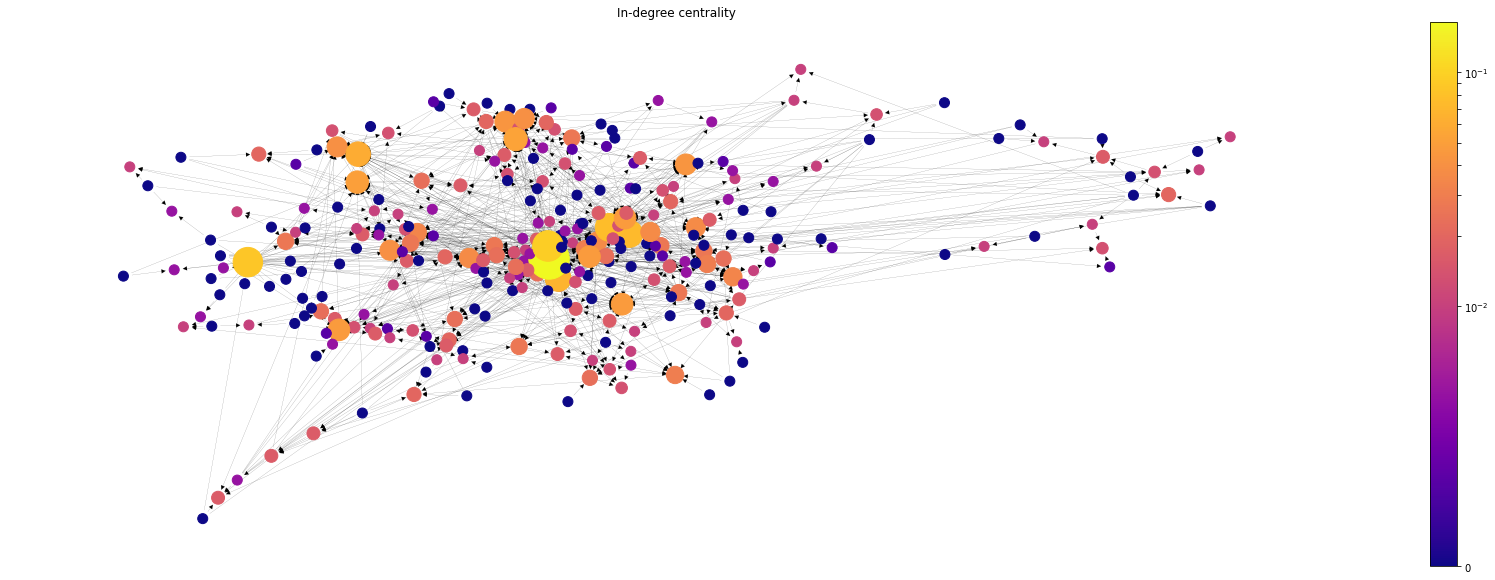

Out Degree centrality
        node     value
0          9  0.006689
1          8  0.000000
2          1  0.010033
3         13  0.023411
4         17  0.046823
..       ...       ...
295      519  0.006689
296      529  0.003344
297  1388162  0.000000
298      517  0.000000
299      317  0.003344

[300 rows x 2 columns]
Các đỉnh có giá trị Out_Degree centrality lớn: [('91', 0.13043478260869565), ('383', 0.0903010033444816), ('34', 0.07023411371237458), ('116', 0.06354515050167224), ('200', 0.06020066889632107), ('122', 0.056856187290969896), ('269', 0.05016722408026756), ('17', 0.046822742474916385), ('2089740', 0.046822742474916385), ('51', 0.043478260869565216), ('71', 0.04013377926421405), ('234', 0.04013377926421405), ('267', 0.04013377926421405), ('39', 0.03678929765886287), ('55', 0.03678929765886287), ('227', 0.03678929765886287), ('275', 0.03678929765886287), ('35', 0.033444816053511704), ('60', 0.033444816053511704), ('26', 0.033444816053511704)]


<Figure size 432x288 with 0 Axes>

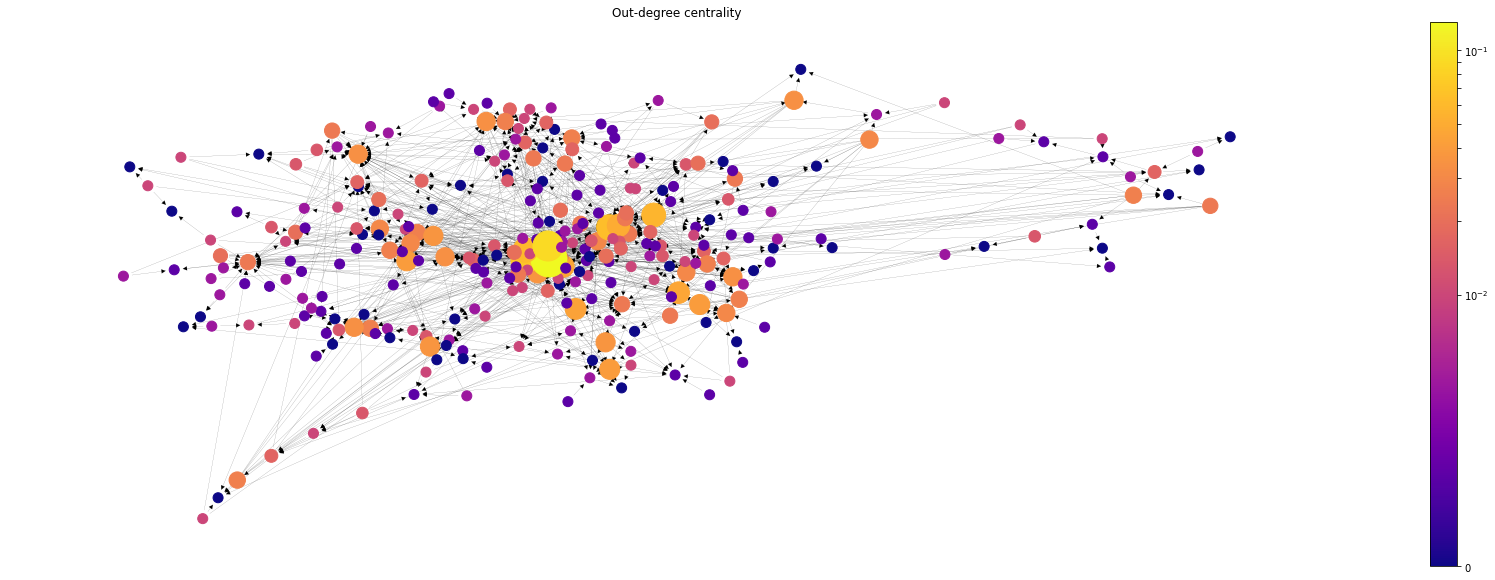

In [16]:
dc = nx.degree_centrality(Graph)
print("Degree centrality")
gu.print_result(dc, "degree centrality")
_, pos = gu.get_com_pos(Graph)
plt.figure(figsize=[30,10])
plot1 = plt.plot(1)
gu.draw_size(Graph, dc, "Degree centrality", pos, 7000, 0.1)
plt.show()
# In degree centrality
In_dc = nx.in_degree_centrality(Graph)
# In giá trị
print("In Degree centrality")
gu.print_result(In_dc, "In_degree centrality")
# Vẽ đồ thị
plot2 = plt.figure(2)
plt.figure(figsize=[30,10])
gu.draw_size(Graph, In_dc, "In-degree centrality", pos, 10000, 0.1)
plt.show()
# Out degree centrality
Out_dc = nx.out_degree_centrality(Graph)
# In giá trị
print("Out Degree centrality")
gu.print_result(Out_dc, "Out_Degree centrality")
# vẽ đồ thị
plot3 = plt.figure(3)
plt.figure(figsize=[30,10])
gu.draw_size(Graph, Out_dc, "Out-degree centrality", pos, 10000, 0.1)
plt.show()

<h2><b>VI. PageRank</b></h2>

        node     value
0          9  0.006121
1          8  0.004309
2          1  0.004549
3         13  0.002219
4         17  0.001165
..       ...       ...
295      519  0.000864
296      529  0.000864
297  1388162  0.001232
298      517  0.002105
299      317  0.000864

[300 rows x 2 columns]
Các đỉnh có giá trị PageRank lớn: [('91', 0.04292919626734544), ('396', 0.027579898048939167), ('454', 0.026783093365059043), ('116', 0.024680015375315317), ('383', 0.021934488227585067), ('83', 0.021797928122421144), ('58', 0.020661112680194077), ('258', 0.016957030025535044), ('342', 0.01653846964999887), ('434', 0.015363436177608984), ('25', 0.014448136313420994), ('307', 0.013373970538173076), ('192', 0.012112855344553485), ('62', 0.011911452834972344), ('134', 0.011252423324625617), ('233', 0.010667219941902575), ('92', 0.010596494327384989), ('136', 0.010529672050865574), ('204', 0.010305010397468395), ('277', 0.010112862224488168)]


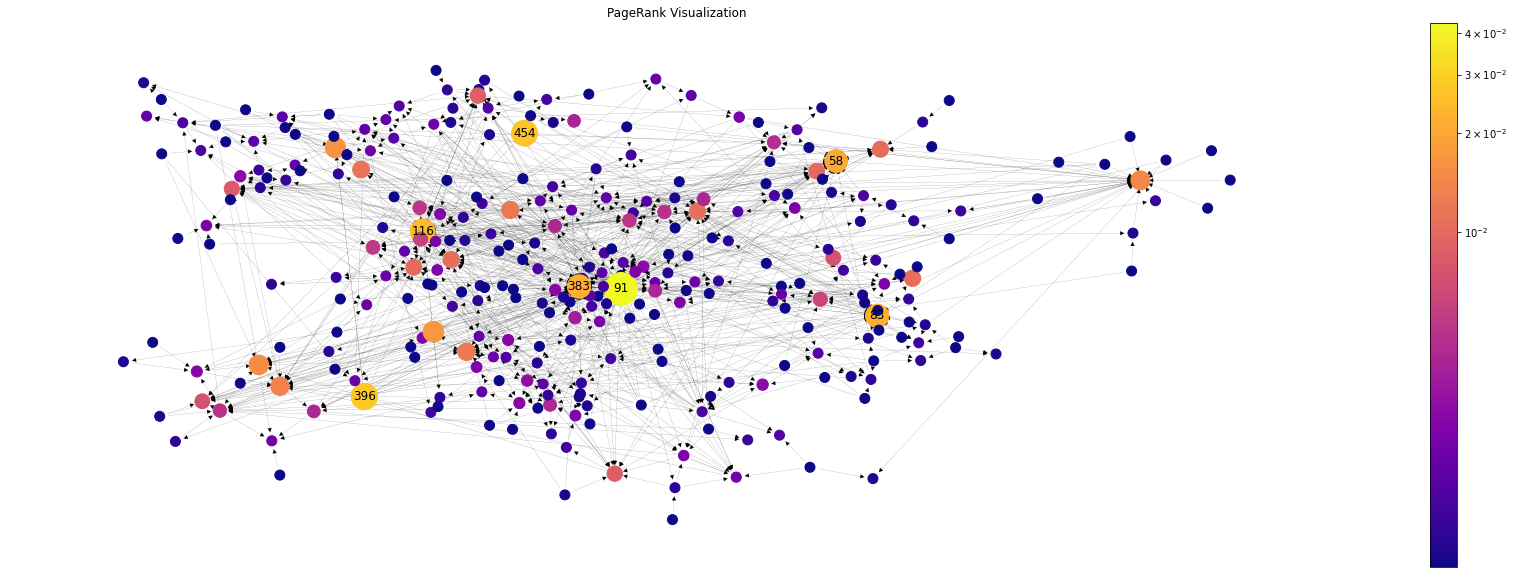

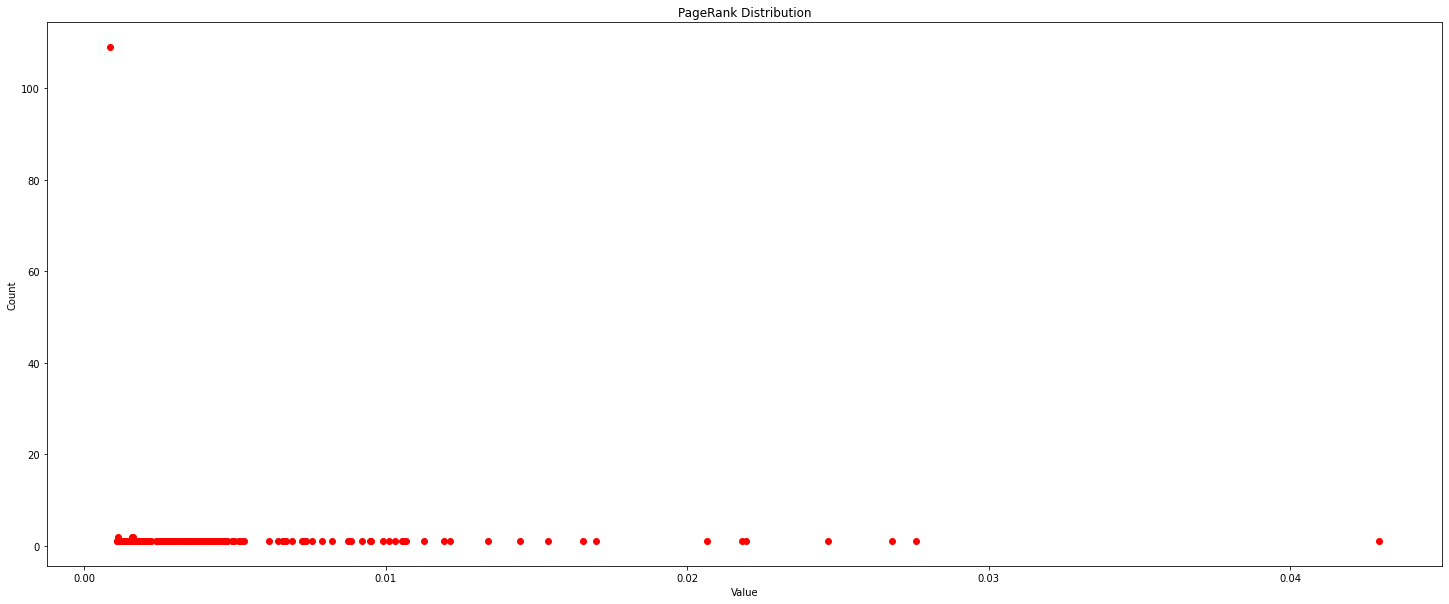

In [8]:
pageRank = nx.pagerank(Graph)
# In giá trị
gu.print_result(pageRank, "PageRank")
# Vẽ đồ thị
_, pos = gu.get_com_pos(Graph)
plt.figure(figsize=[30, 10])
plot1 = plt.figure(1)
gu.draw_size(Graph ,pageRank, "PageRank Visualization", pos, 25000, 0.1, True)
value = dict()
for i in pageRank.values():
    if i in value:
        value[i] += 1
    else:
        value[i] = 1
plt.figure(figsize=[25, 10])
plot2 = plt.figure(2)
plt.plot(list(value.keys()), list(value.values()), 'ro', markersize=6)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("PageRank Distribution")
plt.show()

<h2><b>VII. Betweeness Centrality </b></h2>

        node     value
0          9  0.008137
1          8  0.000000
2          1  0.004185
3         13  0.004206
4         17  0.000984
..       ...       ...
295      519  0.000000
296      529  0.000000
297  1388162  0.000000
298      517  0.000000
299      317  0.000000

[300 rows x 2 columns]
Các đỉnh có giá trị Betweeness_Centrality lớn: [('91', 0.19405287180180056), ('116', 0.0744322522297255), ('383', 0.07169703742913695), ('200', 0.03842727115779337), ('307', 0.03306224796287616), ('58', 0.03227791507322416), ('72', 0.03126480072650247), ('83', 0.025752057353782165), ('25', 0.02570319947038792), ('136', 0.025156552524346357), ('192', 0.025146917582112308), ('342', 0.024742781136096657), ('1384652', 0.023640895663799406), ('92', 0.01821210391587444), ('432', 0.017594700882135217), ('49', 0.016636695713731678), ('39', 0.01613558360430123), ('269', 0.016051978930075102), ('51', 0.016000867834044915), ('60', 0.01553667986167852)]


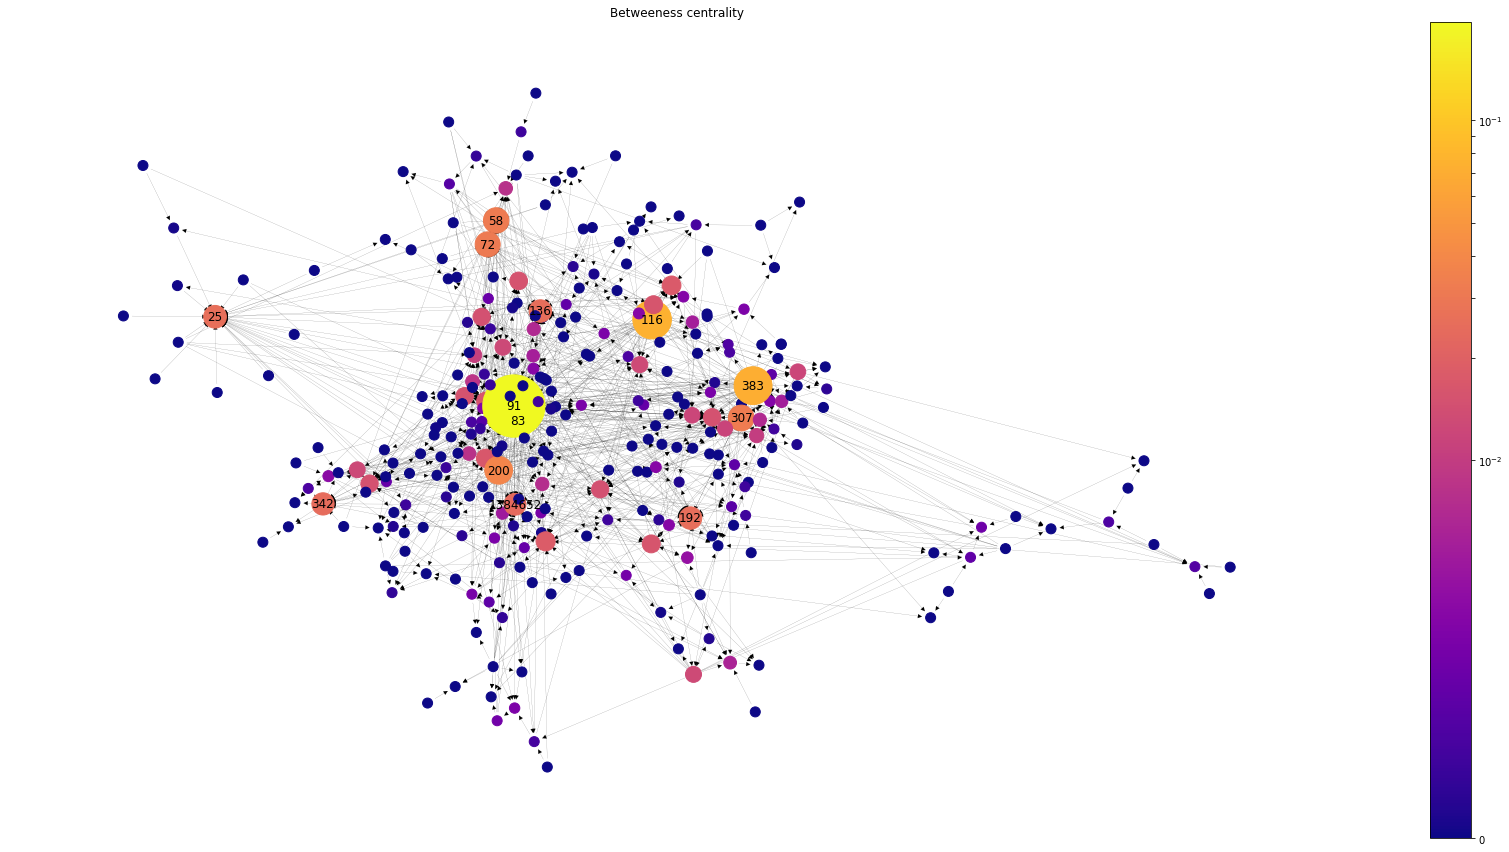

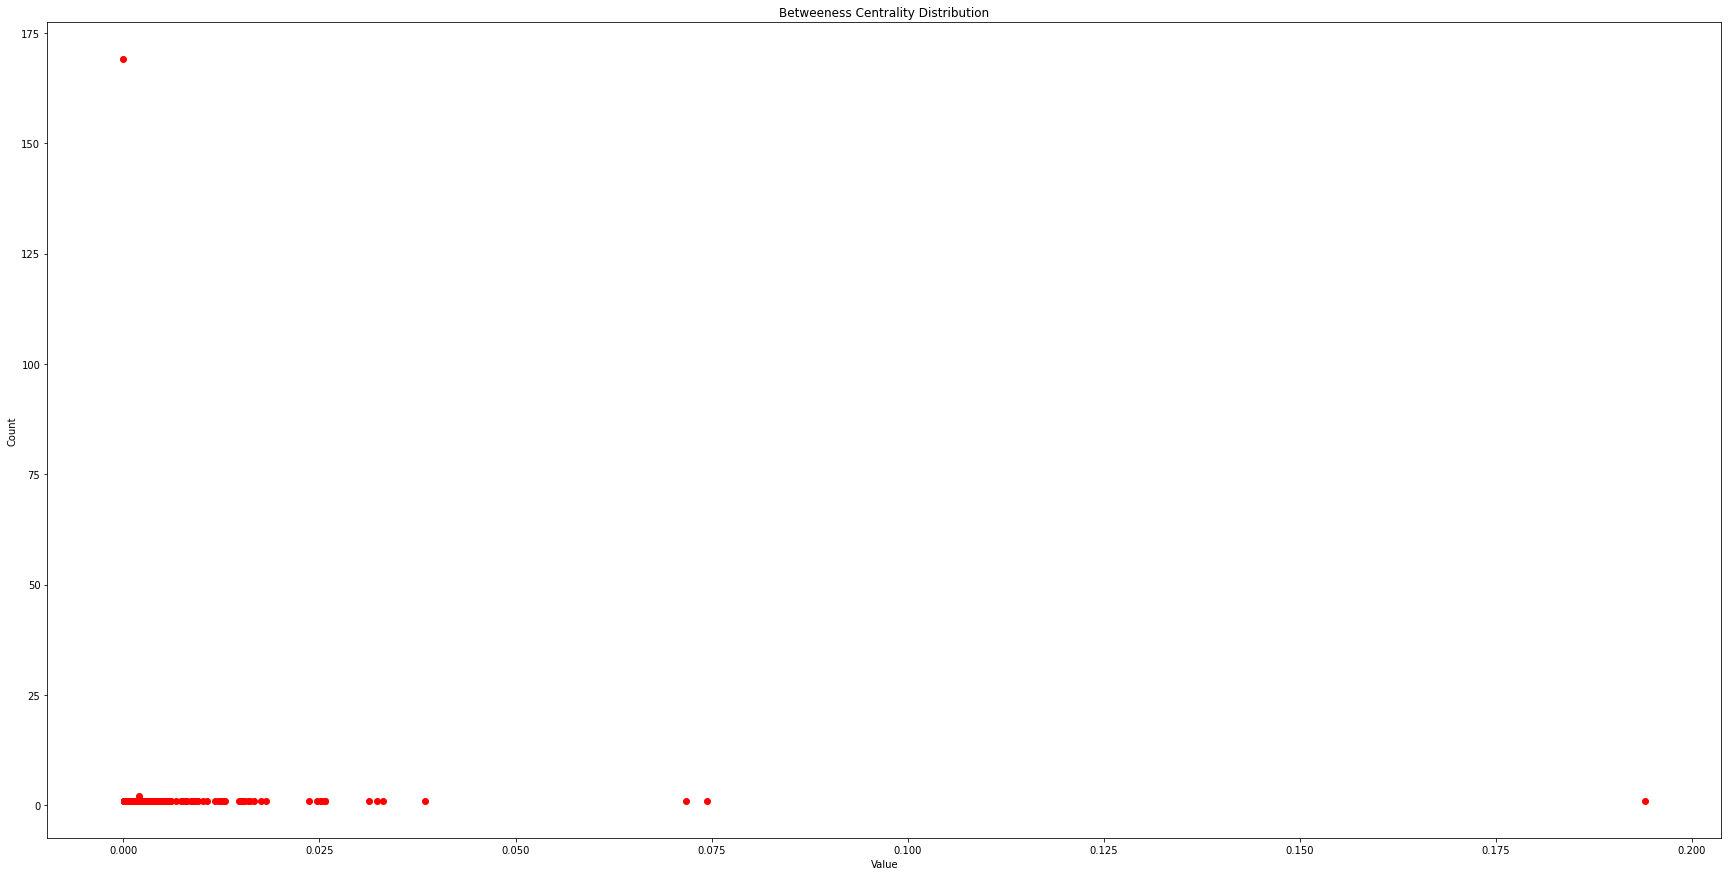

In [9]:
bc = nx.betweenness_centrality(Graph)
# In giá trị
gu.print_result(bc, "Betweeness_Centrality")
# Vẽ đồ thị
_, pos = gu.get_com_pos(Graph)
plt.figure(figsize=[30,15])
plt.figure(1)
gu.draw_size(Graph ,bc, "Betweeness centrality", pos, 20000, edge_width=0.1, DisplayLabel=True)
# betweeness centrality
betweeness_distribute = collections.Counter(list(bc.values()))
plt.figure(figsize=[30,15])
plt.figure(2)
plt.plot(list(betweeness_distribute.keys()), list(betweeness_distribute.values()), 'ro', markersize=6)
plt.ylabel("Count")
plt.xlabel("Value")
plt.title("Betweeness Centrality Distribution")
plt.show()